# Plotting the Kernel Density Estimate of M-17 ice accumulation phase

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
try:
    import simplejson as json
except (ImportError,):
    import json

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.gridspec import GridSpec

In [4]:
import scripts.OxcalReader as ox

In [16]:
# define some nice colour palette to use further on.
colors = sns.palettes.color_palette('colorblind',n_colors=10)

In [17]:
M17 = ox.ReadFile('data/age_model/M17_KDE.json')

In [37]:
kde_M17  = M17['ocd'][1]   # the kernel density object
start_M17 = M17['ocd'][6]  # boundary object
end_M17 = M17['ocd'][-1]  # boundary object

In [28]:
# reading the floods proxy data.
floods = pd.read_table('data/proxies/Alps_flood.tab',sep='\t',header=9)

# rename the columns
floods.columns = ['age','n_alps','s_alps']

# change age scale to AD
floods['age_AD'] = 1950-1000*floods['age']

In [62]:
# read total solar irradiance data
tsi = pd.read_csv('data/proxies/TSI_steinhilber_2009.tab',sep = '\s\s', engine = 'python')

# change age scale to AD
tsi['age_AD'] = 1950 - tsi['year_BP']

In [75]:
def plotTSI(ax):
    
    # plot the data
    ax.plot(tsi['age_AD'].to_numpy(),tsi['dTSI'].to_numpy(),label = '$\Delta$TSI')
    ax.axhline(y=0,color = 'firebrick')
    # ax limits
    ax.set_xlim(400,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # axis labels and ticks
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)
    ax.set_ylabel("$\Delta$TSI (W.m$^{-2}$)")
    
    return ax

In [76]:
def plotFloods(ax):
    
    # plot the data for northern and southern alps
    ax.plot(floods['age_AD'].to_numpy(),floods['s_alps'].to_numpy(),color = 'black', label = 'S Alps')
    ax.plot(floods['age_AD'].to_numpy(),floods['n_alps'].to_numpy(),color = 'firebrick',label = 'N Alps')
    
    # axis limits
    ax_flood.set_xlim(400,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # axis ticks and labels
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)
    ax.set_ylabel("flood frequency (%)")
    
    # axis legend
    ax.legend(loc='best')

    return ax

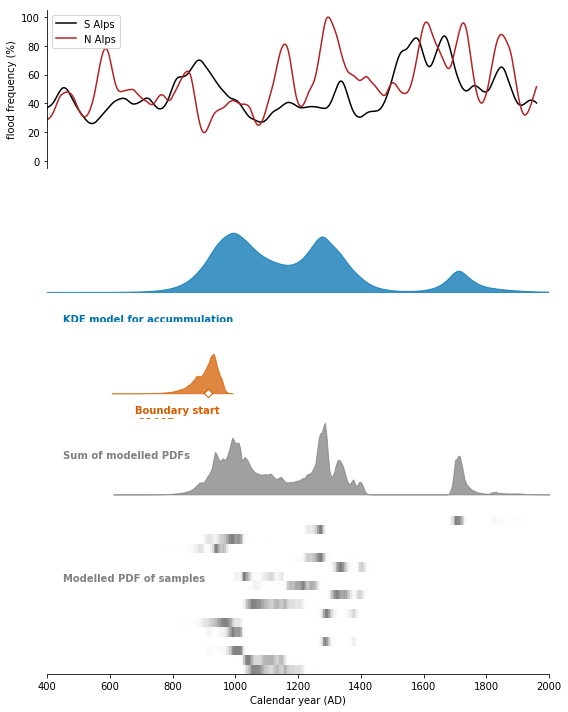

In [87]:
fig = plt.figure( figsize = (8,10))

gs = GridSpec(5, 1, height_ratios=[1, 0.75, 0.5, 0.5, 1])


# proxy total solar irradiance
#ax_tsi = fig.add_subplot(811)
#plotTSI(ax_tsi) 

# Proxy floods
ax_flood = fig.add_subplot(gs[0])
plotFloods(ax_flood)

# KDE plotting

ax1 = fig.add_subplot(gs[1])

# plot KDE model with boundaries
KDE_plot,med = ox.FillBetween(ax1,kde_M17,color = colors[0])
ax1.text(450,-0.3,'KDE model for accummulation', color =colors[0],fontweight = 'bold')
ax1.set_ylim(0,2)

ax2 = fig.add_subplot(gs[2])

s_plot,s_med = ox.FillBetween(ax2,start_M17,median=True,color = colors[3])
#e_plot,e_med = fillBetween(ax2,end_M17,median = True,color = colors[1])

ax2.text(680,-0.6,'Boundary start\n {:.0f}AD'.format(s_med), color =colors[3],fontweight = 'bold')
#ax2.text(1800,0.7,'Boundary end\n {:.0f}AD'.format(e_med), color ='firebrick',fontweight = 'bold')
ax2.set_ylim(0,2)

ax4 = fig.add_subplot(gs[3])
sum_m17 = ox.FillBetween(ax4,M17_kde['ocd'][4],color = 'grey')
ax4.text(450,0.7,'Sum of modelled PDFs', color ='grey',fontweight = 'bold')


ax3 = fig.add_subplot(gs[4])
# plot the simplified PDFs.

for c,date in enumerate(M17_kde['ocd'][8:-1]):
    
    date = ox.MakeRects(ax3,date,c,facecolor = 'grey')

ax3.set_xlabel('Calendar year (AD)')

ax3.set_ylim(0,17)

ax3.text(450,10,'Modelled PDF of samples', color ='gray',fontweight = 'bold')

for ax in (ax1,ax2,ax4):
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)

for ax in (ax1,ax2,ax3,ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_tick_params(left=False)
    ax.set_xlim(400,2000)
    
plt.tight_layout()
plt.savefig('outputs/age_model.pdf',dpi = 300)
plt.show()